# Performing DEG analysis (limma, R) on Pseudobulking from atlas
* Primary tumour samples only
* dataframes made previously (2025-01-13_Pseudobulking.jpynb), seperate for each DC subset and each has seperate metadata file

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

## Load data (starting with just mregDC):

In [3]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


In [4]:
dim(sampleinfo)

[1] 333   1

In [5]:
cts_mregDC <- read.csv("pseudobulk_mregDC_data.csv", row.names = 1)

In [6]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [7]:
dim(cts_mregDC)

[1] 15074   333

In [8]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_mregDC))

In [9]:
# create DGEList variable
y <- DGEList(counts = cts_mregDC, genes = genes)

In [10]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
FAM87B                    0                  0                  0
LINC00115                 0                  0                  0
FAM41C                    0                  0                  0
SAMD11                    0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
FAM87B                       0                    0                    0
LINC00115                    1                    1                    0
FAM41C                       0                    0                    2
SAMD11                       0                    0                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
FAM87B                       0                 0                 0
LINC00115                    0                 0                 1
FAM41C                       0                 1                 0
SAMD11                       0                 0                 0
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
FAM87B                    0                 0                 0
LINC00115                 1                 1                 0
FAM41C                    0                 1                 0
SAMD11                    0                 0                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
FAM87B                    0                 0                 0
LINC00115                 0                 0                 0
FAM41C                    1                 0                 0
SAMD11                    0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
FAM87B                    

In [11]:
dim(y)

[1] 15074   333

## Filtering:

In [12]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [13]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [14]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 10018   333

## Normalise: 

In [15]:
y <- calcNormFactors(y)

In [16]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
LINC00115                 0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
HES4                      0                  2                 12
ISG15                     0                  5                 36
AGRN                      1                  0                  2
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
LINC00115                    0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
HES4                         0                    1                    0
ISG15                        4                    2                    8
AGRN                         0                    3                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
LINC00115                    0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
HES4                         3                    2                    7
ISG15                        5                   18                   11
AGRN                         2                    1                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
LINC00115                    1                    1                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
HES4                         1                    0                    2
ISG15                        6                    4                   10
AGRN                         1                    0                    1
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
LINC00115                    0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
HES4                         0                    0                    0
ISG15                        0                    1                    2
AGRN                         1                    1                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
LINC00115                    0                 0                 1
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
HES4                         0                 0                 0
ISG15                        2                 1                 2
AGRN                         0                 1                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
LINC00115                 1                 1                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
HES4                      4                 0                 1
ISG15                    14                29                 0
AGRN                      0                 0                 1
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
LINC00115                 0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
HES4                      1                 5                 0
ISG15                    22                35                 2
AGRN                      5                 0                 1
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
LINC00115                 

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

In [17]:
library(RColorBrewer)

In [18]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [19]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

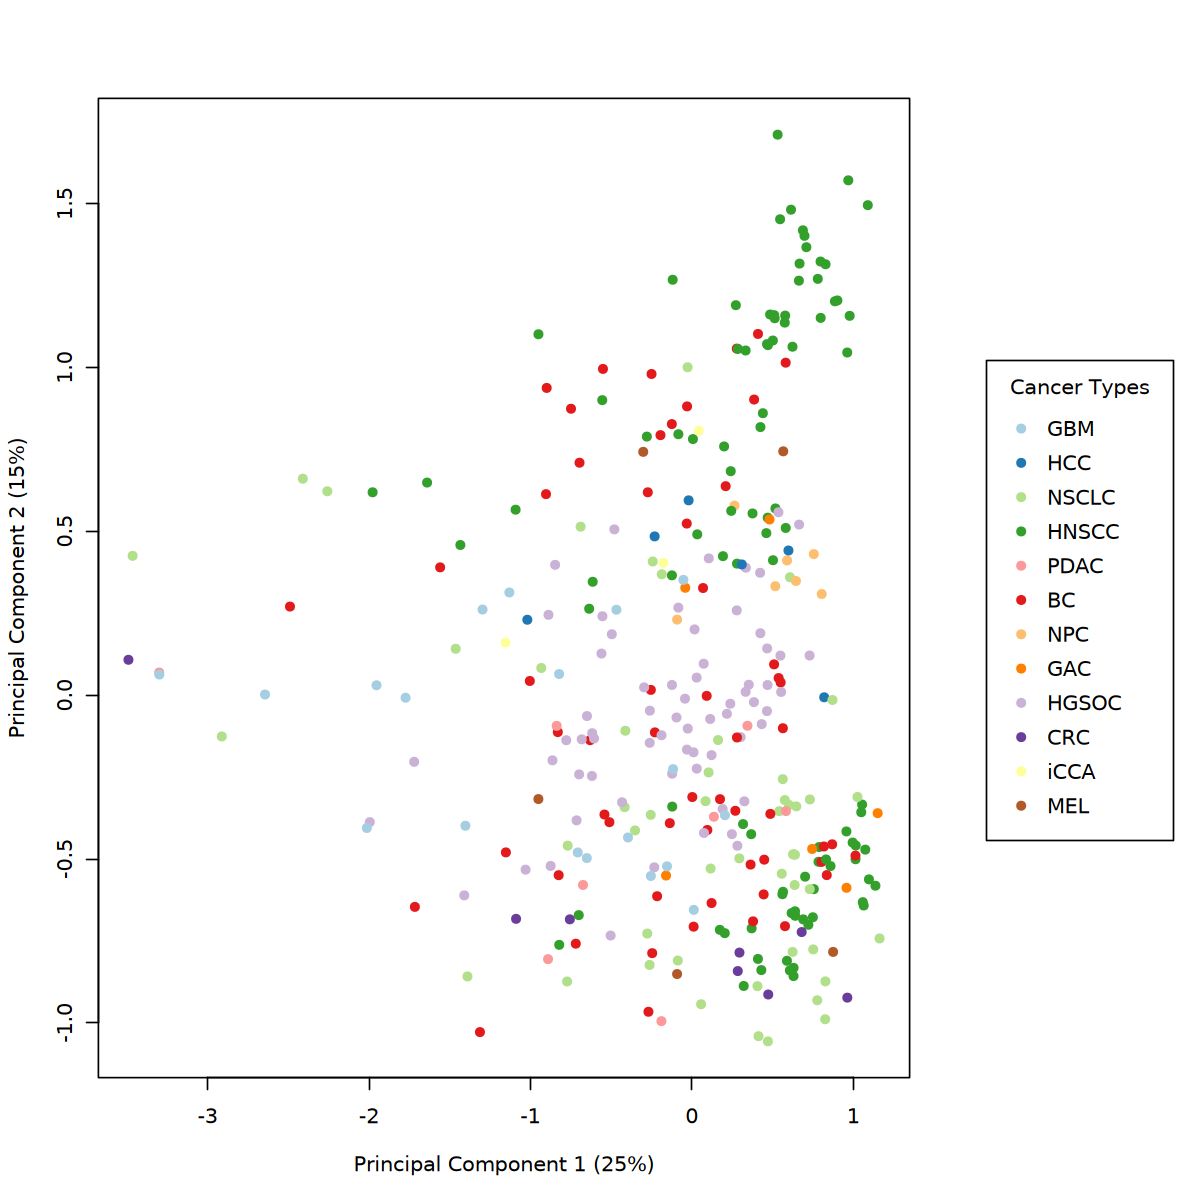

In [20]:
options(repr.plot.height=10, repr.plot.width=10)
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               

# Set up model

In [21]:
# setup model
design <- model.matrix(~ 0 + cancer_broadest, data = sampleinfo)

In [22]:
colnames(design) <- c("BC","CRC","GAC","GBM","HCC","HGSOC","HNSCC","iCCA","MEL","NPC","NSCLC","PDAC")

In [23]:
head(design)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,iCCA,MEL,NPC,NSCLC,PDAC
GGSE223063_GLIO_1,0,0,0,1,0,0,0,0,0,0,0,0
GSE112271_HCC_Pt13,0,0,0,0,1,0,0,0,0,0,0,0
GSE112271_HCC_Pt14,0,0,0,0,1,0,0,0,0,0,0,0
GSE131907_LUAD_T0006,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0009,0,0,0,0,0,0,0,0,0,0,1,0


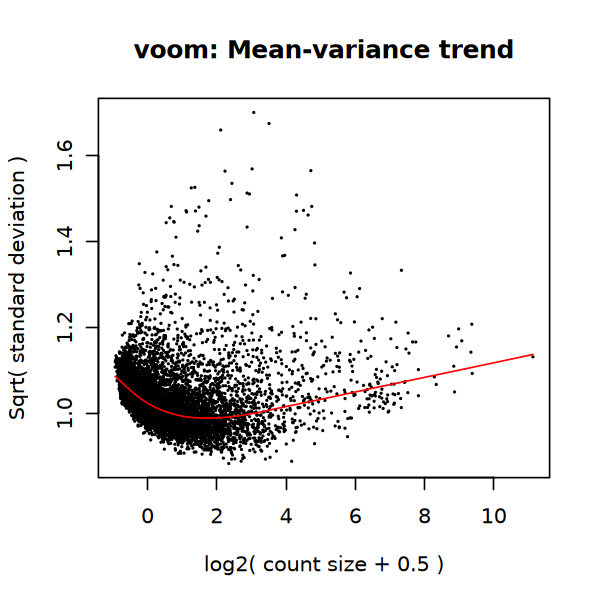

In [24]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [25]:
# lmFit
fit <- lmFit(v, design)

# Contrast - compare HGSOC to the rest

In [26]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC), levels=design) #compare HGSOC to rest
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [30]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)

In [31]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC)
Down                                                                            10018
NotSig                                                                              0
Up                                                                                  0

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HNRNPA2B1,HNRNPA2B1,-87.73639,8.753108,-88.78262,2.511224e-251,1.572340e-248,375.6842
EEF1D,EEF1D,-92.26300,9.415292,-86.70488,1.063161e-247,3.435724e-245,370.7252
H3F3B,H3F3B,-102.29769,10.368169,-92.42952,1.649112e-257,2.753467e-254,370.4351
HNRNPDL,HNRNPDL,-82.09574,8.128932,-82.34702,7.871859e-240,1.213235e-237,369.7347
MORF4L1,MORF4L1,-78.88622,7.994355,-80.31402,4.967002e-236,6.298661e-234,368.3684
UBE2D3,UBE2D3,-81.70880,8.312025,-80.61629,1.335648e-236,1.784070e-234,368.1282


# Contrast - compare HGSOC to each cancer type

In [32]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC-BC,HGSOC-CRC,HGSOC-GAC,HGSOC-GBM,HGSOC-HCC,HGSOC-HNSCC,HGSOC-iCCA,HGSOC-MEL,HGSOC-NPC,HGSOC-NSCLC,HGSOC-PDAC, levels=design) #compare HGSOC to every other individually
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [33]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)
tt2 <- topTable(fit2, coef=2, adjust="BH", number = Inf)
tt3 <- topTable(fit2, coef=3, adjust="BH", number = Inf)
tt4 <- topTable(fit2, coef=4, adjust="BH", number = Inf)
tt5 <- topTable(fit2, coef=5, adjust="BH", number = Inf)
tt6 <- topTable(fit2, coef=6, adjust="BH", number = Inf)
tt7 <- topTable(fit2, coef=7, adjust="BH", number = Inf)
tt8 <- topTable(fit2, coef=8, adjust="BH", number = Inf)
tt9 <- topTable(fit2, coef=9, adjust="BH", number = Inf)
tt10 <- topTable(fit2, coef=10, adjust="BH", number = Inf)
tt11 <- topTable(fit2, coef=11, adjust="BH", number = Inf)

In [34]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - BC HGSOC - CRC HGSOC - GAC HGSOC - GBM HGSOC - HCC HGSOC - HNSCC
Down          392          40         112         466          11          1339
NotSig       9196        9911        9358        9121       10002          4529
Up            430          67         548         431           5          4150
       HGSOC - iCCA HGSOC - MEL HGSOC - NPC HGSOC - NSCLC HGSOC - PDAC
Down              5          13         355           414           17
NotSig        10010        9992        7707          8921         9969
Up                3          13        1956           683           32

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


In [ ]:
# select top 250 up, and 250 down genes from tt1
up_genes_tt1 <- tt1 %>% filter(logFC > 0 & adj.P.Val < 0.05) %>% select(Symbol) %>% head(500) %>% unlist %>% as.character
down_genes_tt1 <- tt1 %>% filter(logFC < 0 & adj.P.Val < 0.05) %>% select(Symbol) %>% head(500) %>% unlist %>% as.character

In [50]:
plot_genes_tt1 <- c(up_genes_tt1, down_genes_tt1)

In [51]:
# log normalise transformed gene expression
mat_tt1 <- v$E[plot_genes_tt1, ]
dim(mat_tt1)

[1] 822 333

In [52]:
library(pheatmap)

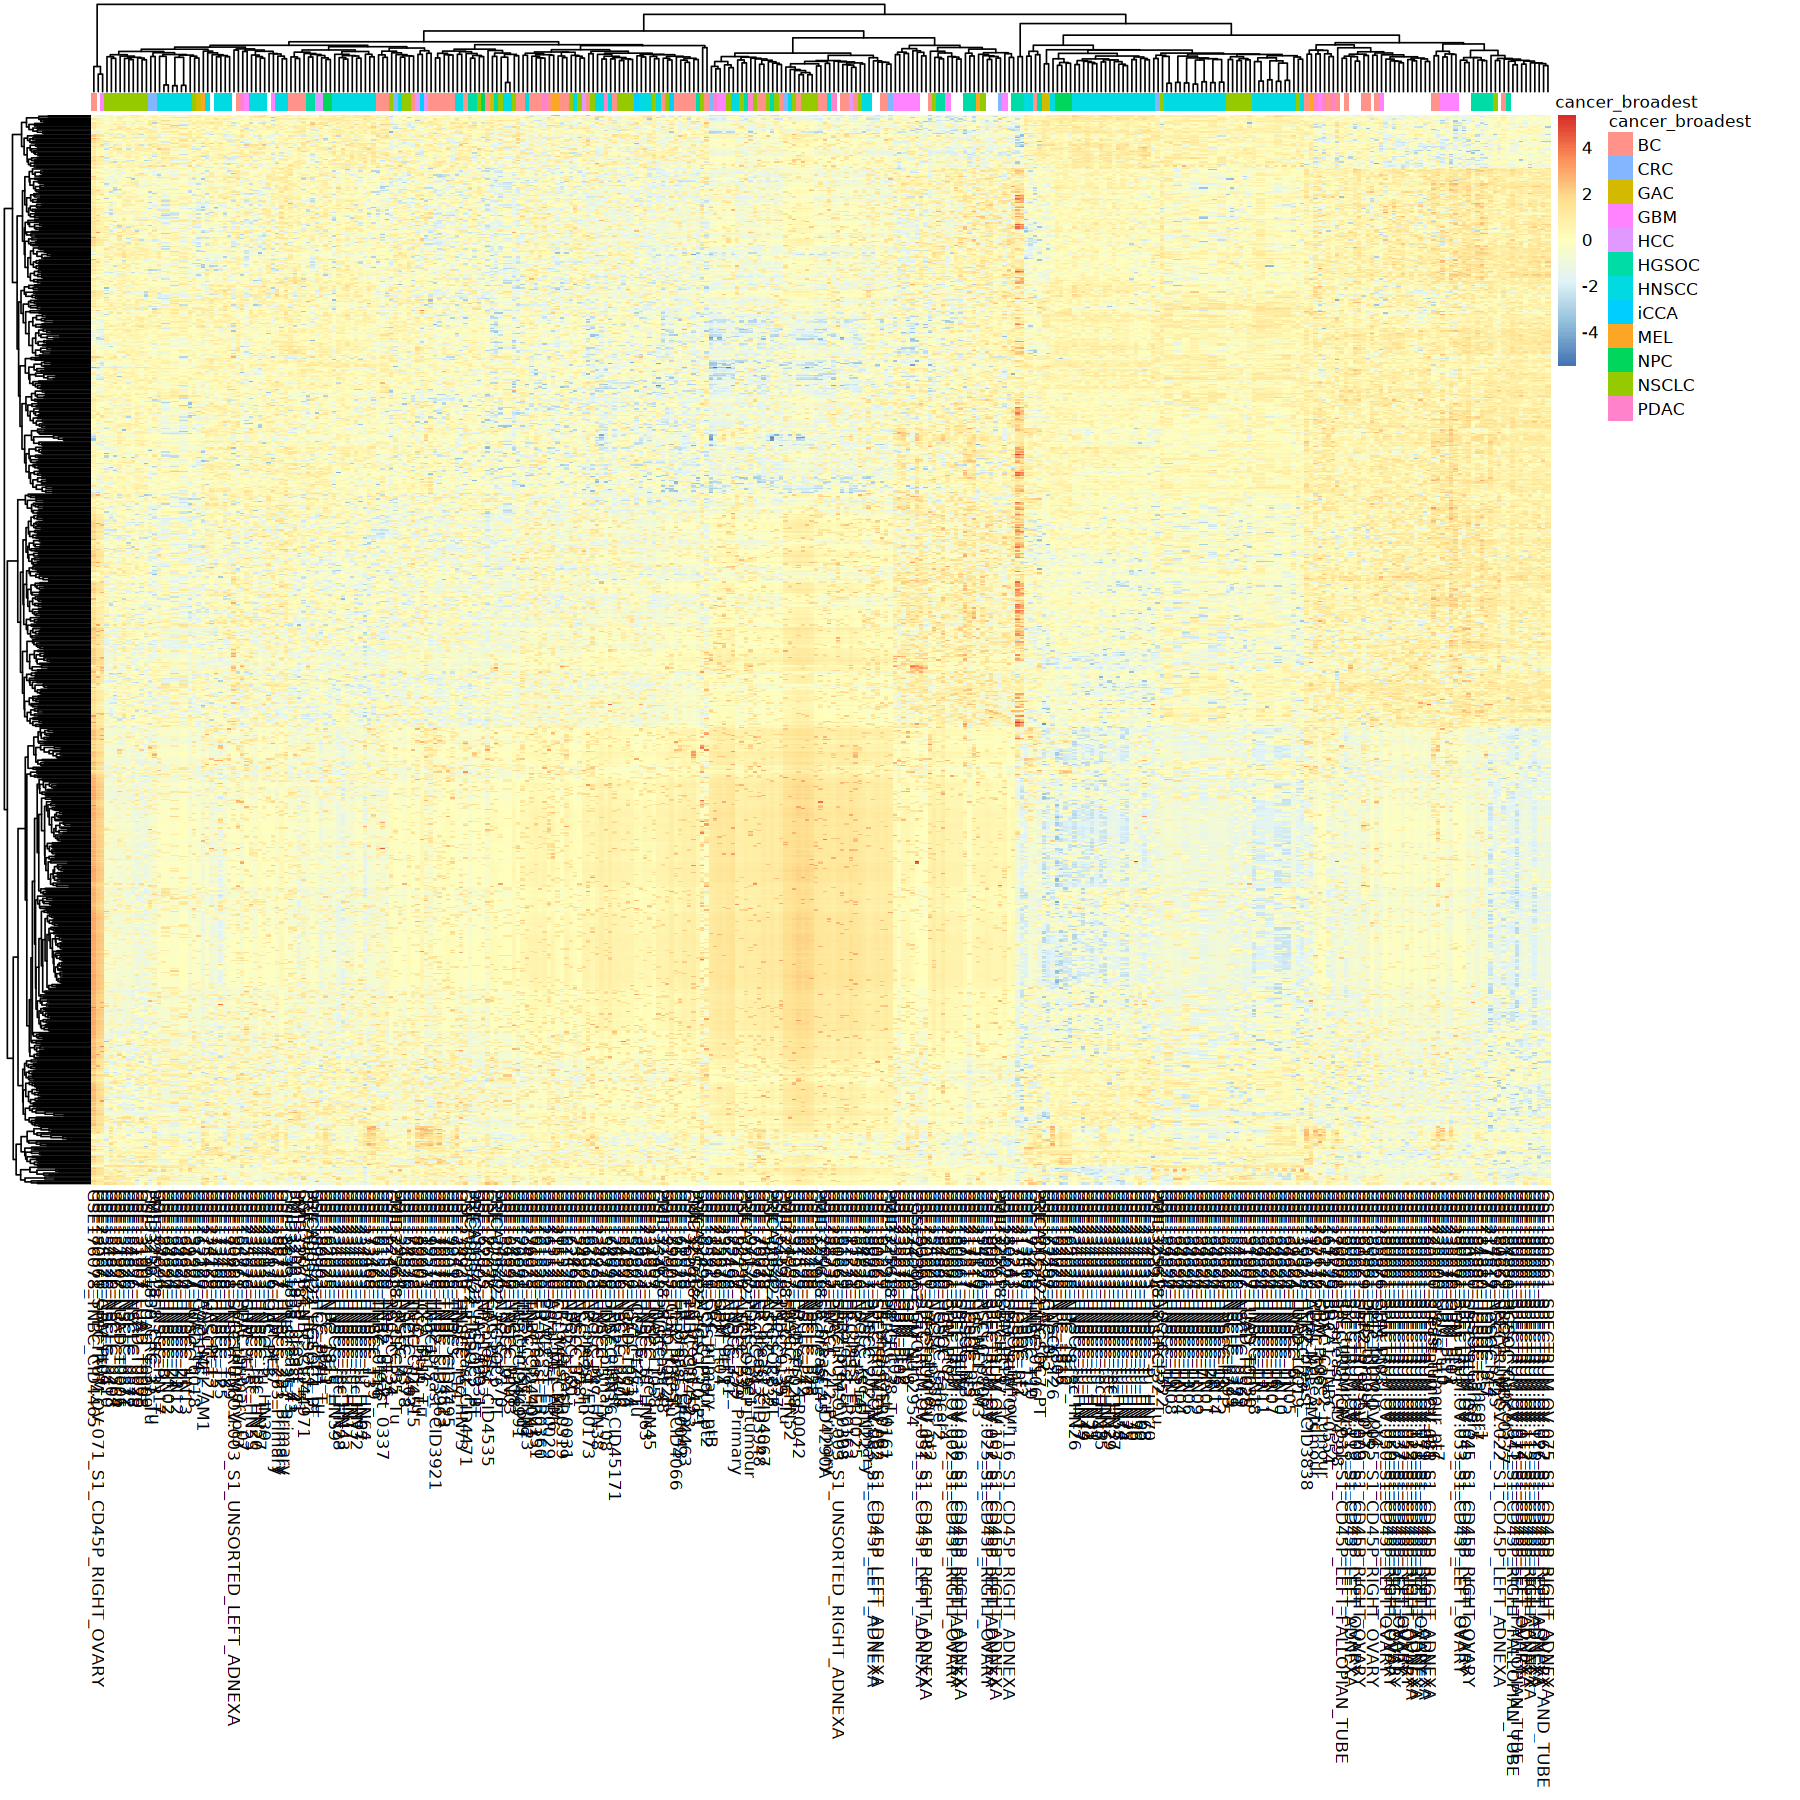

In [53]:
options(repr.plot.height=15, repr.plot.width=15)
pheatmap(mat_tt1, scale = "row", show_rownames = FALSE, annotation_col = sampleinfo[, "cancer_broadest", drop=FALSE])